In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#!pip install optuna
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [3]:
!pip install optuna

     |████████████████████████████████| 308 kB 29.8 MB/s 
     |████████████████████████████████| 209 kB 54.9 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 112 kB 61.7 MB/s 
     |████████████████████████████████| 149 kB 60.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=1dbf1b8bb800aa4ad1fe2a5762cda7bd8420c7e1dd9f495191012a8845e66b74
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline



# General libraries.
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time 

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import sklearn
import xgboost as xgb
import optuna
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
#nltk.download('wordnet')
#conda install -c conda-forge wordcloud

# Data Preparation
## Data Collected from https://www.yelp.com/dataset/download
## File size for Yelp Review - 6.94 GB
## 1 Million records were extracted from the JSON and converted to CSV

In [5]:
## Reading the dataset with 10K records and splitting them in train and test set
## Added this file creation since we were toggling between Local jupyter notebook, Kaggle and Colab. 
## So created the trimmed file created for portability and for reduced resource utilization

In [6]:
from os.path import exists

dir_list = os.listdir('gdrive/My Drive/')

file_exists = exists('gdrive/My Drive/Colab Notebooks/yelp_academic_dataset_review.csv')
file_exists

#dir_list

True

In [7]:
#train_dataset=pd.read_csv('yelp_academic_dataset_review.csv')
train_dataset=pd.read_csv('gdrive/My Drive/Colab Notebooks/yelp_academic_dataset_review.csv')

In [8]:
from sklearn.utils import shuffle

def sentimentGrouping(s):
    if (s >= 4):
        rating=1
    elif (s == 3):
        rating=0
    else:
        rating=-1
    
    return rating

#Restaurant Ratings 
print("Restaurant Ratings",pd.unique(train_dataset['stars']))
print("No. of Reviews for each rating:\n",pd.value_counts(train_dataset['stars']))

train_dataset['Sentiments'] = train_dataset.apply(lambda x: sentimentGrouping(x['stars']), axis=1)

X = train_dataset["text"]
y = train_dataset["Sentiments"]

X,y = shuffle(X,y)

train_data, dev_data, train_labels, dev_labels = train_test_split(X, y, test_size=0.2)


Restaurant Ratings [4 5 2 1 3]
No. of Reviews for each rating:
 5    4194
4    2558
3    1211
1    1179
2     858
Name: stars, dtype: int64


##Let's Consider Rating 4 & 5 - Positive
##Let's Consider Rating 3 - Neutral
##Let's Consider Rating 1 & 2 - Negative

In [9]:
#Negative Sentiments
neg_phrases = train_dataset[train_dataset.Sentiments == -1]
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
negative_words = pd.Series(neg_words).str.cat(sep=' ')

#Positive Sentiments
positive_phrases = train_dataset[train_dataset.Sentiments == 1]
positive_words = []
for t in positive_phrases.text:
    positive_words.append(t)
pos_words = pd.Series(positive_words).str.cat(sep=' ')

#Neutral Sentiments
neutral_phrases = train_dataset[train_dataset.Sentiments == 0]
neutral_words = []
for t in neutral_phrases.text:
    neutral_words.append(t)
neu_words = pd.Series(neutral_words).str.cat(sep=' ')

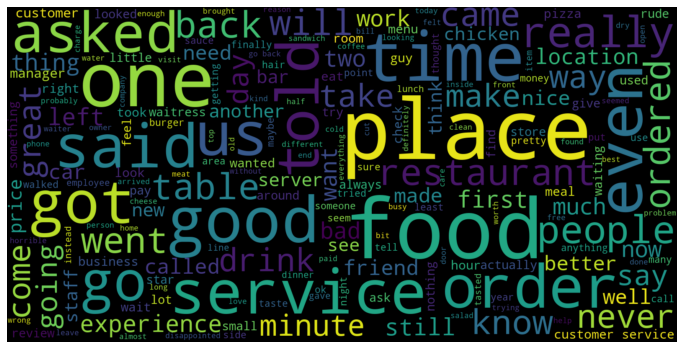

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

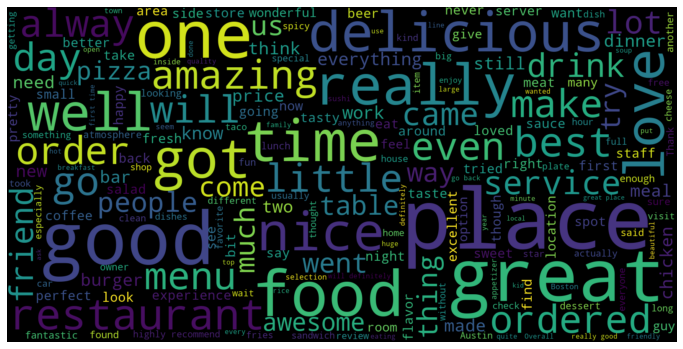

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

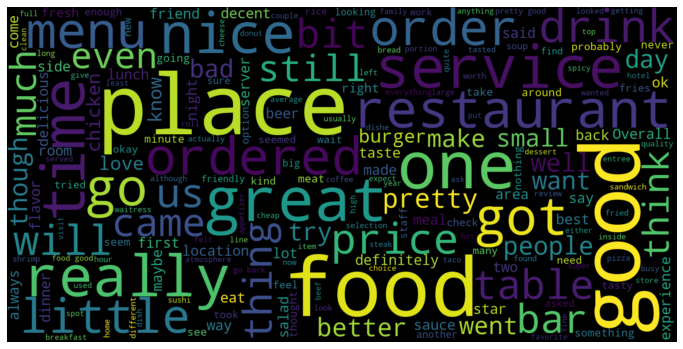

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neu_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
## Logistic Regression Model used for the text classification without any hyperparameter tuning

In [14]:
vector = CountVectorizer(analyzer='word', stop_words='english')

X_train = vector.fit_transform(train_data)

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_train)

X_dev = vector.transform(dev_data)
dev_tfidf = tfidf_transformer.transform(X_dev)

lr_clf = LogisticRegression(C=0.5,solver="liblinear", multi_class="auto",penalty="l2",tol=0.015)
lr_clf.fit(train_tfidf, train_labels)

dev_labels_pred = lr_clf.predict(X_dev)
    
#mse = np.sqrt(sum((dev_labels - dev_labels_pred) ** 2))
#print("Accuracy for Model Logistic Regression is %f" % ( accuracy))
print("F1 score is %f" % (f1_score(dev_labels, dev_labels_pred, average='weighted')))
#print("Number of vocabulary: ",len(vector_reduced.vocabulary_))

print(classification_report(dev_labels,dev_labels_pred))
print("Accuracy of Logistic Regression without Hyperparameter Tuning: %f" % (accuracy_score(dev_labels,dev_labels_pred)))

F1 score is 0.768268
              precision    recall  f1-score   support

          -1       0.73      0.67      0.70       413
           0       0.31      0.53      0.39       242
           1       0.90      0.81      0.86      1345

    accuracy                           0.75      2000
   macro avg       0.65      0.67      0.65      2000
weighted avg       0.80      0.75      0.77      2000

Accuracy of Logistic Regression without Hyperparameter Tuning: 0.750000


In [15]:
print("Number of vocabulary: ",len(vector.vocabulary_))

Number of vocabulary:  23399


In [16]:
#Model Parameter tuning
#Trying different Regularization Strength for L1 and L2 simultaneously
#Using L1 regression to reduce the vocabulary
#Applying L2 regression on the reduced Vocabulary

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.1
F1 score is 0.676016
Number of vocabulary:  325
Accuracy 0.744000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.2
F1 score is 0.733990
Number of vocabulary:  365
Accuracy 0.785500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.3
F1 score is 0.752644
Number of vocabulary:  394
Accuracy 0.796500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.4
F1 score is 0.766610
Number of vocabulary:  431
Accuracy 0.804500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.5
F1 score is 0.777844
Number of vocabulary:  469
Accuracy 0.813000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.6
F1 score is 0.778808
Number of vocabulary:  523
Accuracy 0.812500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.7
F1 score is 0.778458
Number of vocabulary:  582
Accuracy 0.812500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.8
F1 score is 0.784966
Number of vocabulary:  619
Accuracy 0.816500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  0.9
F1 score is 0.788016
Number of vocabulary:  674
Accuracy 0.818500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Regularization strength for L1 and L2 :  1.0
F1 score is 0.788202
Number of vocabulary:  736
Accuracy 0.818500


Text(0, 0.5, 'Log of vocabulary')

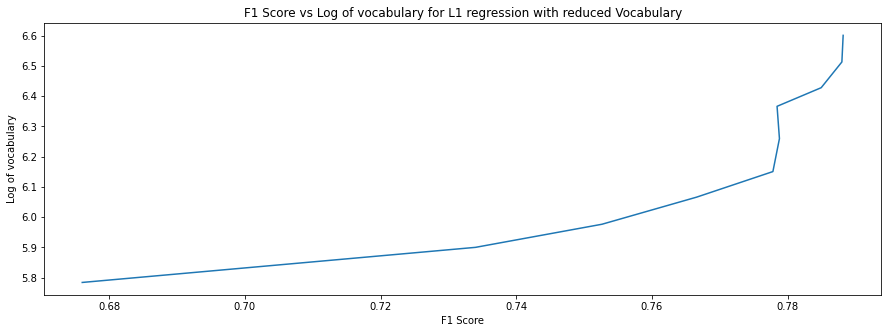

In [17]:

c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


f1_score_lst = []
vocabularies = []

for val in c:
        
    vector = CountVectorizer(analyzer='word', stop_words='english')
    X_train = vector.fit_transform(train_data)
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(X_train)
    
    lr_clf = LogisticRegression(C=val,solver="liblinear", multi_class="auto", penalty="l1",tol=.015)
    lr_clf.fit(train_tfidf, train_labels)

    features = vector.get_feature_names()

    feature_dict = {}
    feature_zero = []
    vocabulary_exclude=[]

    #Get the feature and increment them for each topic if they're zero
    for topic in range(lr_clf.coef_.shape[0]):
      for feature in range(lr_clf.coef_.shape[1]): 
        if (lr_clf.coef_[topic][feature] == 0):
            feature_dict[feature] = feature_dict.get(feature,0) + 1

    #Identify the vocabs for the features which are 0 coef for all stars
    #and exclude them
    for feature in feature_dict:
      if feature_dict[feature] == lr_clf.coef_.shape[0]:
        feature_zero.append(feature)
        vocabulary_exclude.append(features[feature])

    vector_reduced = CountVectorizer(analyzer='word',stop_words=vocabulary_exclude)
    X_train = vector_reduced.fit_transform(train_data)
    X_dev = vector_reduced.transform(dev_data)
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(X_train)
    dev_tfidf = tfidf_transformer.fit_transform(X_dev)

    lr_clf_2 = LogisticRegression(C=val,solver="liblinear", multi_class="auto", penalty="l2",tol=.015)
    lr_clf_2.fit(train_tfidf, train_labels)

    dev_labels_pred = lr_clf_2.predict(dev_tfidf)

    print("Regularization strength for L1 and L2 : ",val)
    print("F1 score is %f" % (f1_score(dev_labels, dev_labels_pred, average='weighted')))
    len_vocab = len(vector_reduced.vocabulary_)
    log_vocab = np.log(len_vocab)
    print("Number of vocabulary: ",len(vector_reduced.vocabulary_))
    print("Accuracy %f" % accuracy_score(dev_labels,dev_labels_pred))
    
    
    f1_score_lst.append(f1_score(dev_labels, dev_labels_pred, average='weighted'))
    vocabularies.append(log_vocab)
        

plt.figure(figsize=(15,5))

plt.plot(f1_score_lst, vocabularies)
plt.title("F1 Score vs Log of vocabulary for L1 regression with reduced Vocabulary")
plt.xlabel('F1 Score')
plt.ylabel('Log of vocabulary')

In [18]:
#Performing lemmatization and regularization

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.686413
Number of vocabulary:  5439
C Value for L1 and L2:  0.1
Accuracy 0.746500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.737186
Number of vocabulary:  5474
C Value for L1 and L2:  0.2
Accuracy 0.784500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.761775
Number of vocabulary:  5524
C Value for L1 and L2:  0.3
Accuracy 0.801500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.777299
Number of vocabulary:  5553
C Value for L1 and L2:  0.4
Accuracy 0.812500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.787331
Number of vocabulary:  5596
C Value for L1 and L2:  0.5
Accuracy 0.819000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.795227
Number of vocabulary:  5634
C Value for L1 and L2:  0.6
Accuracy 0.826000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.799953
Number of vocabulary:  5681
C Value for L1 and L2:  0.7
Accuracy 0.827500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.801442
Number of vocabulary:  5723
C Value for L1 and L2:  0.8
Accuracy 0.828500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.800643
Number of vocabulary:  5778
C Value for L1 and L2:  0.9
Accuracy 0.827000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



F1 score is 0.805950
Number of vocabulary:  5808
C Value for L1 and L2:  1.0
Accuracy 0.831000


Text(0, 0.5, 'Log of vocabulary')

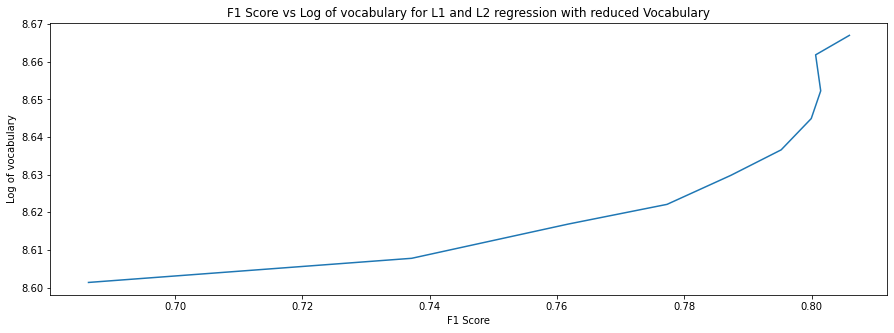

In [19]:


def preprocessor_custom(doc):
    
    new_doc = str(doc)
    
    new_doc = re.sub(r'[^A-Za-z\s]',r' ',new_doc)

    new_doc = " ".join([w.lower() for w in new_doc.split()])
    
    wordnet_lemmatizer = WordNetLemmatizer()
    new_doc = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in new_doc.split()])
    
    return new_doc

c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


f1_score_lst = []
vocabularies = []

for val in c:

    vector = CountVectorizer(analyzer='word', preprocessor=preprocessor_custom)
    X_train = vector.fit_transform(train_data)
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(X_train)

    lr_clf = LogisticRegression(C=val,solver="liblinear", multi_class="auto", penalty="l1",tol=.015)
    lr_clf.fit(train_tfidf, train_labels)

    features = vector.get_feature_names()

    feature_dict = {}
    feature_zero = []
    vocabulary_exclude=[]

    #Get the feature and increment them for each topic if they're zero
    for topic in range(lr_clf.coef_.shape[0]):
      for feature in range(lr_clf.coef_.shape[1]): 
        if (lr_clf.coef_[topic][feature] == 0):
            feature_dict[feature] = feature_dict.get(feature,0) + 1

    #Identify the vocabs for the features which are 0 coef for all stars
    #and exclude them
    for feature in feature_dict:
      if feature_dict[feature] == lr_clf.coef_.shape[0]:
        feature_zero.append(feature)
        vocabulary_exclude.append(features[feature])

    vector_reduced = CountVectorizer(analyzer='word', stop_words=vocabulary_exclude)
    X_train = vector_reduced.fit_transform(train_data)
    X_dev = vector_reduced.transform(dev_data)
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(X_train)
    dev_tfidf = tfidf_transformer.fit_transform(X_dev)

    lr_clf_2 = LogisticRegression(C=val,solver="liblinear", multi_class="auto", penalty="l1",tol=.015)
    lr_clf_2.fit(train_tfidf, train_labels)

    dev_labels_pred = lr_clf_2.predict(dev_tfidf)

    print("F1 score is %f" % (f1_score(dev_labels, dev_labels_pred, average='weighted')))
    len_vocab = len(vector_reduced.vocabulary_)
    log_vocab = np.log(len_vocab)
    print("Number of vocabulary: ",len(vector_reduced.vocabulary_))
    print("C Value for L1 and L2: ",val)
    print("Accuracy %f" % accuracy_score(dev_labels,dev_labels_pred))
    f1_score_lst.append(f1_score(dev_labels, dev_labels_pred, average='weighted'))
    vocabularies.append(log_vocab)

plt.figure(figsize=(15,5))

plt.plot(f1_score_lst, vocabularies)
plt.title("F1 Score vs Log of vocabulary for L1 and L2 regression with reduced Vocabulary")
plt.xlabel('F1 Score')
plt.ylabel('Log of vocabulary')

## We observed better accuracy from Logistic Regression Model of 0.823 after applying L1 and L2 regularization with Strength 1.0 without lemmatization

## With Lemmatization we observed the accuracy from Logistic Regression Model to be 0.831 after applying L1 and L2 regularization with Strength 0.9 


In [20]:
#Based on the Above Finding came up with the final Logistic Regression model

vector = CountVectorizer(analyzer='word', preprocessor=preprocessor_custom)
X_train = vector.fit_transform(train_data)
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_train)

lr_clf = LogisticRegression(C=1.0,solver="liblinear", multi_class="auto", penalty="l1",tol=.015)
lr_clf.fit(train_tfidf, train_labels)

features = vector.get_feature_names()

feature_dict = {}
feature_zero = []
vocabulary_exclude=[]

#Get the feature and increment them for each topic if they're zero
for topic in range(lr_clf.coef_.shape[0]):
  for feature in range(lr_clf.coef_.shape[1]): 
    if (lr_clf.coef_[topic][feature] == 0):
        feature_dict[feature] = feature_dict.get(feature,0) + 1

#Identify the vocabs for the features which are 0 coef for all stars
#and exclude them
for feature in feature_dict:
  if feature_dict[feature] == lr_clf.coef_.shape[0]:
    feature_zero.append(feature)
    vocabulary_exclude.append(features[feature])

vector_reduced = CountVectorizer(analyzer='word', stop_words=vocabulary_exclude)

start_time = datetime.datetime.now().replace(microsecond=0)
X_train = vector_reduced.fit_transform(train_data)
end_time = datetime.datetime.now().replace(microsecond=0)
model_training_time = end_time - start_time
print("Duration is seconds %s" % model_training_time.total_seconds())

X_dev = vector_reduced.transform(dev_data)
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_train)
dev_tfidf = tfidf_transformer.fit_transform(X_dev)

modelLR = LogisticRegression(C=val,solver="liblinear", multi_class="auto", penalty="l1",tol=.015)
modelLR.fit(train_tfidf, train_labels)

dev_labels_pred = modelLR.predict(dev_tfidf)
dev_labels_pred_prob = modelLR.predict_proba(dev_tfidf)[:, 1]

#from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(dev_labels,dev_labels_pred, pos_label=2)
#auc = metrics.roc_auc_score(X_dev, dev_labels_pred_prob)
f1 = f1_score(dev_labels, dev_labels_pred, average='weighted')
accuracy = accuracy_score(dev_labels,dev_labels_pred)
recall = recall_score(dev_labels, dev_labels_pred, average='weighted')
precision = precision_score(dev_labels, dev_labels_pred, average='weighted')

print("F1 score is %f" % (f1))
len_vocab = len(vector_reduced.vocabulary_)
log_vocab = np.log(len_vocab)
print("Number of vocabulary: ",len(vector_reduced.vocabulary_))
print("Accuracy of Final Logistic Regression Model with Regularization Strength 1 and  %f" % accuracy)
#print("AUC: %f " % (auc))
print("Confusion Matrix ")
print(metrics.confusion_matrix(dev_labels, dev_labels_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Duration is seconds 1.0
F1 score is 0.804898
Number of vocabulary:  5808
Accuracy of Final Logistic Regression Model with Regularization Strength 1 and  0.830000
Confusion Matrix 
[[ 315   23   75]
 [  57   46  139]
 [  31   15 1299]]


In [21]:
!pip install tabulate

In [22]:
from tabulate import tabulate
from sklearn import metrics

summary = []


def summary_model_performance(algorithm,accuracy,f1,recall,precision,duration):

    model_performance_1 = [algorithm,accuracy,f1,recall,precision,duration]

    summary.append(model_performance_1)

#head = ["Algorithm", "HyperParameter Tuning", "Comments","auc", "Accuracy", "F1 Score"]
algorithm = "Logistic Regression"
tuning_info = "L1 L2 Regularization Strength set to 1"
more_info = "Used CountVectorizer, TfidfTransformer and Lemmatization on Text Data"

summary_model_performance(algorithm,accuracy,f1,recall,precision,model_training_time.total_seconds())


In [23]:
# In all the subsequent Model we will continue to use the Training Data (X_train) and Test Data (X_Dev) we obtained 
# after applying Lemmatization & L1 L2 regularization using Logistic regression

In [24]:
#Performing Classification using XGB Classifier

Duration is seconds 128.0
F1 score is 0.796065
Number of vocabulary:  5808
C Value for L1 and L2:  1.0
Accuracy 0.816000


Text(0, 0.5, 'Log of vocabulary')

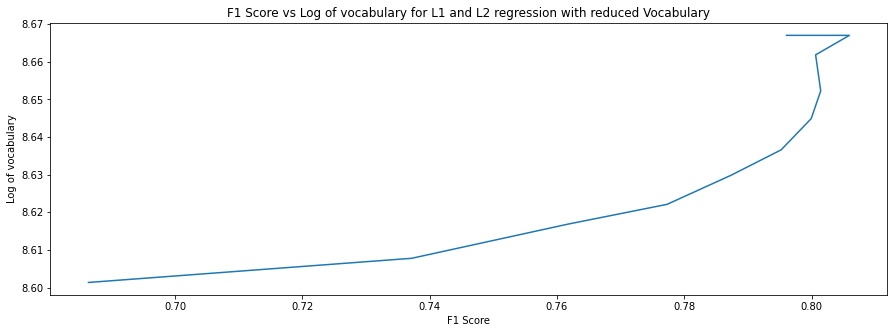

In [25]:
xc=XGBClassifier(n_estimators=1000)
start_time = datetime.datetime.now().replace(microsecond=0)
xc.fit(train_tfidf, train_labels)
end_time = datetime.datetime.now().replace(microsecond=0)
model_training_time = end_time - start_time
print("Duration is seconds %s" % model_training_time.total_seconds())

xc_labels_pred = xc.predict(dev_tfidf)

f1 = f1_score(dev_labels, xc_labels_pred, average='weighted')
accuracy = accuracy_score(dev_labels,xc_labels_pred)
recall = recall_score(dev_labels, xc_labels_pred, average='weighted')
precision = precision_score(dev_labels, xc_labels_pred, average='weighted')
algorithm = "XGB Classifier"
summary_model_performance(algorithm,accuracy,f1,recall,precision,model_training_time.total_seconds())

print("F1 score is %f" % (f1_score(dev_labels, xc_labels_pred, average='weighted')))
len_vocab = len(vector_reduced.vocabulary_)
log_vocab = np.log(len_vocab)
print("Number of vocabulary: ",len(vector_reduced.vocabulary_))
print("C Value for L1 and L2: ",val)
f1_score_lst.append(f1_score(dev_labels, xc_labels_pred, average='weighted'))
print("Accuracy %f" % accuracy_score(dev_labels,xc_labels_pred))

vocabularies.append(log_vocab)

plt.figure(figsize=(15,5))

plt.plot(f1_score_lst, vocabularies)
plt.title("F1 Score vs Log of vocabulary for L1 and L2 regression with reduced Vocabulary")
plt.xlabel('F1 Score')
plt.ylabel('Log of vocabulary')

In [26]:
#Performing Classification using Random Forest 

Training Duration is seconds 74.0
F1 score is 0.671252
Number of vocabulary:  5808
C Value for L1 and L2:  1.0
Accuracy of Random Forest Classifier Model 0.743000


Text(0, 0.5, 'Log of vocabulary')

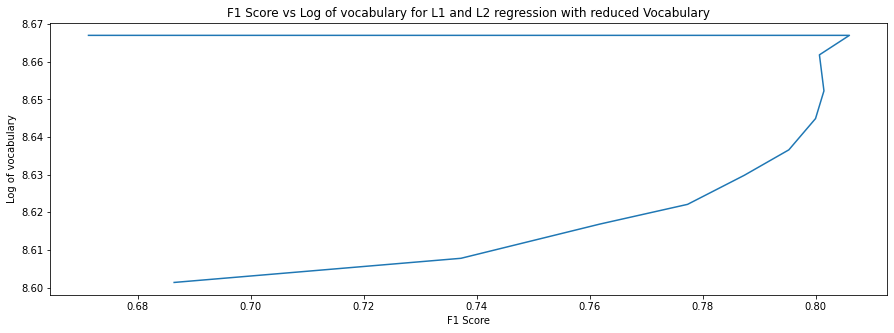

In [27]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=1000)
start_time = datetime.datetime.now().replace(microsecond=0)
rc.fit(train_tfidf, train_labels)
end_time = datetime.datetime.now().replace(microsecond=0)
model_training_time = end_time - start_time
print("Training Duration is seconds %s" % model_training_time.total_seconds())

rc_labels_pred = rc.predict(dev_tfidf)

print("F1 score is %f" % (f1_score(dev_labels, rc_labels_pred, average='weighted')))
len_vocab = len(vector_reduced.vocabulary_)
log_vocab = np.log(len_vocab)
print("Number of vocabulary: ",len(vector_reduced.vocabulary_))
print("C Value for L1 and L2: ",val)
f1_score_lst.append(f1_score(dev_labels, rc_labels_pred, average='weighted'))
print("Accuracy of Random Forest Classifier Model %f" % accuracy_score(dev_labels,rc_labels_pred))

#from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(dev_labels,dev_labels_pred, pos_label=2)
#print("AUC: %f " % (metrics.auc(fpr, tpr)))

f1 = f1_score(dev_labels, rc_labels_pred, average='weighted')
accuracy = accuracy_score(dev_labels,rc_labels_pred)
algorithm = "RandomForest"
#summary_model_performance(algorithm,accuracy,f1,model_training_time.total_seconds())

recall = recall_score(dev_labels, rc_labels_pred, average='weighted')
precision = precision_score(dev_labels, rc_labels_pred, average='weighted')
summary_model_performance(algorithm,accuracy,f1,recall,precision,model_training_time.total_seconds())

vocabularies.append(log_vocab)

plt.figure(figsize=(15,5))

plt.plot(f1_score_lst, vocabularies)
plt.title("F1 Score vs Log of vocabulary for L1 and L2 regression with reduced Vocabulary")
plt.xlabel('F1 Score')
plt.ylabel('Log of vocabulary')

In [28]:
#Performing Classification using Support Vector Machine 

In [29]:
svc=svm.SVC()
param={'kernel':('linear','rbf'),'C':[1,10]}
sv=GridSearchCV(svc,param)

start_time = datetime.datetime.now().replace(microsecond=0)
sv.fit(train_tfidf, train_labels)
end_time = datetime.datetime.now().replace(microsecond=0)
model_training_time = end_time - start_time
print("Training Duration is seconds %s" % model_training_time.total_seconds())

sorted(sv.cv_results_.keys())

Training Duration is seconds 351.0


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

F1 score is 0.808092
Number of vocabulary:  5808
Accuracy of Support Vector Machine Model 0.828500


Text(0, 0.5, 'Log of vocabulary')

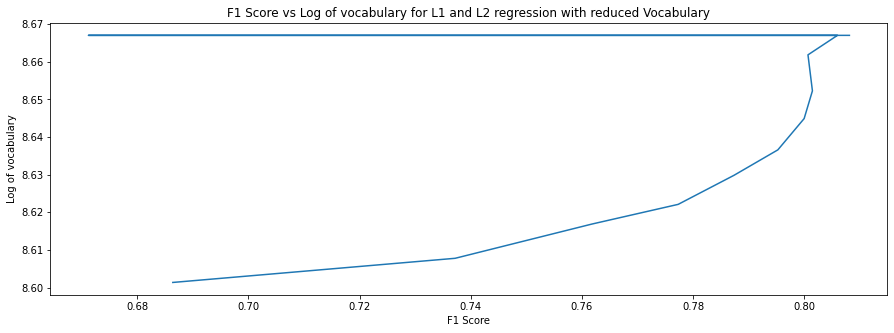

In [30]:
sv_labels_pred=sv.predict(dev_tfidf)
print("F1 score is %f" % (f1_score(dev_labels, sv_labels_pred, average='weighted')))
len_vocab = len(vector_reduced.vocabulary_)
log_vocab = np.log(len_vocab)
print("Number of vocabulary: ",len(vector_reduced.vocabulary_))
f1_score_lst.append(f1_score(dev_labels, sv_labels_pred, average='weighted'))
print("Accuracy of Support Vector Machine Model %f" % accuracy_score(dev_labels,sv_labels_pred))

f1 = f1_score(dev_labels, sv_labels_pred, average='weighted')
accuracy = accuracy_score(dev_labels,sv_labels_pred)
algorithm = "Support Vector Machine"
#summary_model_performance(algorithm,accuracy,f1,model_training_time.total_seconds())

recall = recall_score(dev_labels, sv_labels_pred, average='weighted')
precision = precision_score(dev_labels, sv_labels_pred, average='weighted')
summary_model_performance(algorithm,accuracy,f1,recall,precision,model_training_time.total_seconds())

vocabularies.append(log_vocab)

plt.figure(figsize=(15,5))

plt.plot(f1_score_lst, vocabularies)
plt.title("F1 Score vs Log of vocabulary for L1 and L2 regression with reduced Vocabulary")
plt.xlabel('F1 Score')
plt.ylabel('Log of vocabulary')


In [31]:
#Multinomial Naive bayes Classifier

In [32]:
model_NB = MultinomialNB()

start_time = datetime.datetime.now().replace(microsecond=0)
model_NB.fit(train_tfidf, train_labels) 
end_time = datetime.datetime.now().replace(microsecond=0)
model_training_time = end_time - start_time
print("Training Duration is seconds %s" % model_training_time.total_seconds())

dev_labels_pred = model_NB.predict(dev_tfidf)
print("Accuracy for Model MultinomialNB, is %f" % (accuracy_score(dev_labels, dev_labels_pred)))
print(classification_report(dev_labels,dev_labels_pred))

#from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(dev_labels,dev_labels_pred, pos_label=2)
#print("AUC: %f " % (metrics.auc(fpr, tpr)))

#fpr, tpr, thresholds = metrics.roc_curve(dev_labels,dev_labels_pred, pos_label=2)
#auc = metrics.auc(fpr, tpr)
f1 = f1_score(dev_labels, dev_labels_pred, average='weighted')
accuracy = accuracy_score(dev_labels,dev_labels_pred)
algorithm = "Multinomial Naive Bayes"
#summary_model_performance(algorithm,accuracy,f1,model_training_time.total_seconds())
recall = recall_score(dev_labels, dev_labels_pred, average='weighted')
precision = precision_score(dev_labels, dev_labels_pred, average='weighted')
summary_model_performance(algorithm,accuracy,f1,recall,precision,model_training_time.total_seconds())

Training Duration is seconds 0.0
Accuracy for Model MultinomialNB, is 0.701500
              precision    recall  f1-score   support

          -1       0.97      0.14      0.25       413
           0       0.00      0.00      0.00       242
           1       0.69      1.00      0.82      1345

    accuracy                           0.70      2000
   macro avg       0.55      0.38      0.35      2000
weighted avg       0.67      0.70      0.60      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

In [33]:
#XGboost

In [34]:
def objective(trial):

    dtrain = xgb.DMatrix(train_tfidf, label=train_labels)
    dtest = xgb.DMatrix(dev_tfidf, label=dev_labels)

    param = {
        
        "objective": "multi:softmax",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree"]),
        "num_class":3,
        }

    if param["booster"] == "gbtree":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
  

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial,"validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
   
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(dev_labels, pred_labels)
    return accuracy


In [35]:
lc=LabelEncoder()
train_labels=lc.fit_transform(train_labels)
dev_labels=lc.transform(dev_labels)

study = optuna.create_study(direction="maximize")

[I 2021-12-02 18:21:22,522] A new study created in memory with name: no-name-6ea60d33-88c6-4f1d-8f1d-6a8eed94e2ab


In [36]:
#study.optimize(objective, n_trials=1)
#print(study.best_trial)

In [37]:
# Using Convolution Neural Network for Text Classification

In [38]:
%%capture
!pip install wandb

In [ ]:
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D

import wandb
from wandb.keras import WandbCallback

# Initialize wandb with your project name
run = wandb.init(project='sentiment-analysis',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.005,
                     "epochs": 5,
                     "batch_size": 1024,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN",
                     "dataset": "YELP Reviews"
                 })

config = wandb.config
config.vocab_size = 1000
config.maxlen = 1000
config.batch_size=32
config.embedding_dims = 10
config.filters = 16
config.kernel_size = 3
config.hidden_dims = 250
config.epochs = 10


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


In [ ]:
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D

import wandb
from wandb.keras import WandbCallback

# Initialize wandb with your project name
run = wandb.init(project='sentiment-analysis',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": 0.005,
                     "epochs": 5,
                     "batch_size": 1024,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN",
                     "dataset": "CIFAR-10"
                 })

config = wandb.config
config.vocab_size = 1000
config.maxlen = 1000
config.batch_size=32
config.embedding_dims = 10
config.filters = 16
config.kernel_size = 3
config.hidden_dims = 250
config.epochs = 10

tokenizer = text.Tokenizer(num_words=config.vocab_size)
tokenizer.fit_on_texts(train_data)

X_train = tokenizer.texts_to_matrix(train_data)
X_test = tokenizer.texts_to_matrix(dev_data)

X_train = sequence.pad_sequences(X_train, maxlen=config.maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=config.maxlen)

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
Lr=LabelEncoder()
Lr.fit(train_labels)
train_l=Lr.transform(train_labels)
test_l=Lr.transform(dev_labels)

train_l=np_utils.to_categorical(train_l)

model = Sequential()
model.add(Embedding(config.vocab_size, config.embedding_dims, input_length=config.maxlen))
model.add(Dropout(0.5))

model.add(Conv1D(config.filters,config.kernel_size,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(config.filters,config.kernel_size,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(config.hidden_dims,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[['acc']])
start_time = datetime.datetime.now().replace(microsecond=0)
history = model.fit(X_train, train_l, batch_size=config.batch_size, epochs=config.epochs)
end_time = datetime.datetime.now().replace(microsecond=0)
model_training_time = end_time - start_time
print("Training Duration is seconds %s" % model_training_time.total_seconds())


preds=model.predict(X_test)
preds=np.argmax(preds,1)
from sklearn.metrics import accuracy_score
#print("Accuracy of CNN %f : " % (accuracy_score(test_l, preds)))

#fpr, tpr, thresholds = metrics.roc_curve(dev_labels,dev_labels_pred, pos_label=2)
#auc = metrics.auc(fpr, tpr)
f1 = f1_score(dev_labels, preds, average='weighted')
accuracy = accuracy_score(test_l, preds)
print("Accuracy %f" % accuracy)
print("f1 score %f" % f1)
algorithm = "Convolution Neural Network"
#summary_model_performance(algorithm,accuracy,f1,model_training_time.total_seconds())
recall = recall_score(dev_labels, preds, average='weighted')
precision = precision_score(dev_labels, preds, average='weighted')
summary_model_performance(algorithm,accuracy,f1,recall,precision,model_training_time.total_seconds())

In [ ]:
#ModelPerformance Summary
print("Model Performances for YELP Reviews")
head = ["Algorithm", "Accuracy", "F1 Score", "Recall Score", "Precision Score", "Model Training Duration(in seconds)"]
#print(summary)
print(tabulate(summary, headers=head, tablefmt="grid"))